


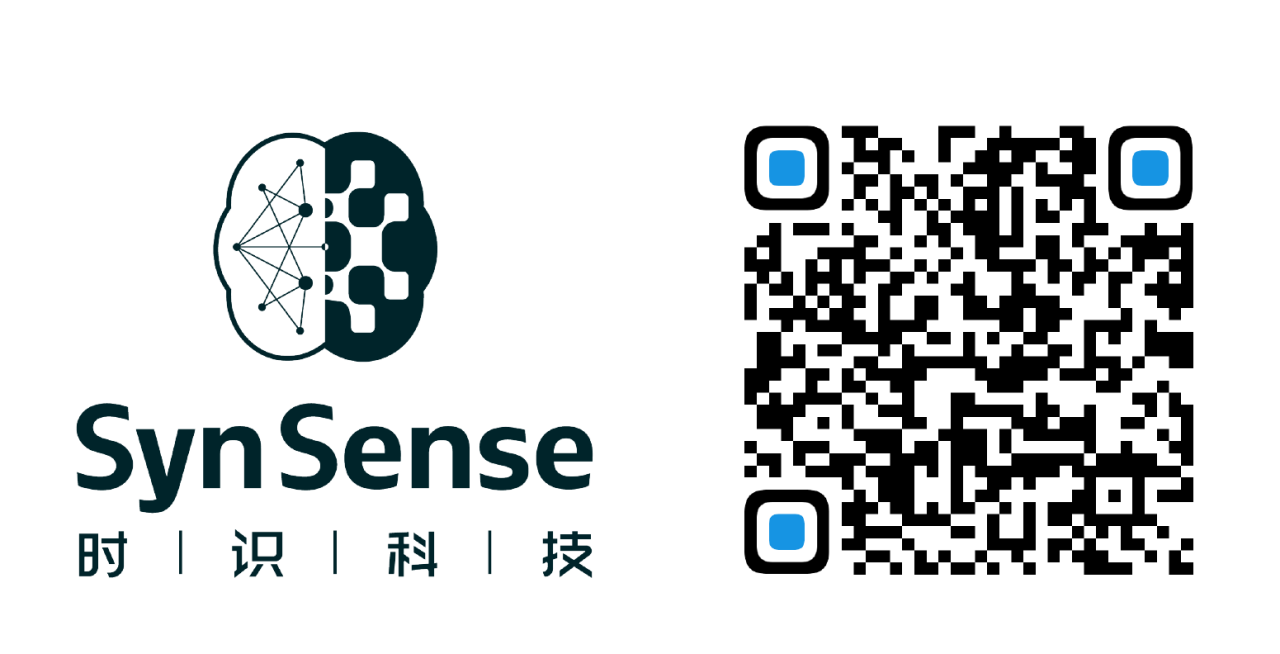






# How to train CNN

在这篇文档里， 我们将学习如何用pytorch来构建一个卷积神经网络并利用它进行一个简单的手写数字识别实验





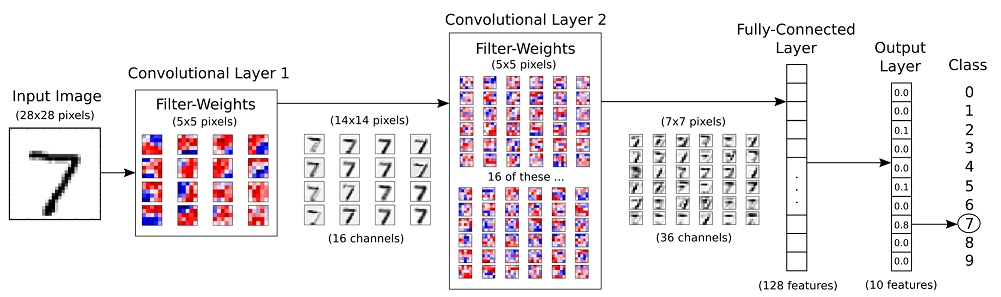





## Packages

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision

## 输入数据

### 在开始之前， 我们提前定义一个输入张量


`input_2d_img` 是一个3维浮点数张量，也可以认为是一个图像


In [ ]:
input_2d_img = torch.tensor([[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]], 
                             [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]], 
                             [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]], dtype = torch.float)

In [ ]:
print("The shape of input_2d_img is", input_2d_img.shape)

## 2D卷积

### `nn.Conv2d()` 是pytorch提供的2D卷积语句。

输入的张量纬度应符合(batch_size, input_channels, input_height, input_width)

语句的用法为
`torch.nn.Conv2d(in_channel, out_channels, kernel_size, stride, padding, bias)`


input_channels: 输入张量通道数

out_channels: 输出图像通道数

kernel_size: 卷积核大小

stride: 卷积核平移步长

Padding：两边补0个数

bias: 是否加入可学习的bias

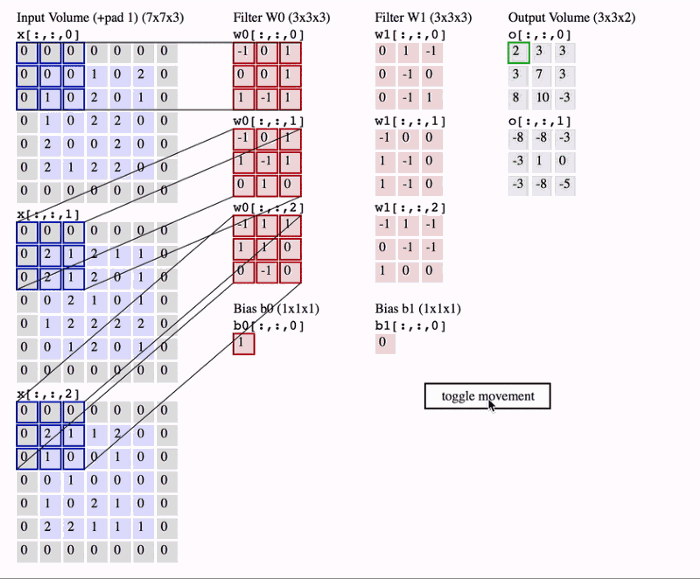

### 首先我们将2d图像信号 `input_2d_img` 定义为一个Batch=1的4维张量

In [ ]:
input_2d_img = input_2d_img.unsqueeze(0)
print(input_2d_img.shape)

### 然后我们定义一个输入通道为3， 输出通道为1，卷积核大小为[3, 3], 卷积步长为1的巻积操作

In [ ]:
cnn2d_1 = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, stride=1)
print("cnn2d_1: \n")
print(cnn2d_1(input_2d_img).shape, "\n")
print(cnn2d_1(input_2d_img))

### 然后我们定义一个输入通道为3， 输出通道为1，卷积核大小为[3, 3], 卷积步长为2的巻积操作

In [ ]:
cnn2d_2 = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, stride=2)
print("cnn2d_2: \n")
print(cnn2d_2(input_2d_img).shape, "\n")
print(cnn2d_2(input_2d_img))

### 然后我们定义一个输入通道为3， 输出通道为1，卷积核大小为[2, 2], 卷积步长为1的巻积操作

In [ ]:
cnn2d_3 = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=2, stride=1)
print("cnn2d_3: \n")
print(cnn2d_3(input_2d_img).shape, "\n")
print(cnn2d_3(input_2d_img))

### 然后我们定义一个输入通道为3， 输出通道为5，卷积核大小为[3, 3], 卷积步长为1的巻积操作

In [ ]:
cnn2d_4 = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=3, stride=1)
print("cnn2d_4: \n")
print(cnn2d_4(input_2d_img).shape, "\n")
print(cnn2d_4(input_2d_img))

## 从上面四种不同的卷积操作中， 我们可以看出不同卷积核大小对输出的特征图大小的影响

### 给定卷积操作的 卷积核大小`kernel_size`, 卷积步长`stride`和补零尺寸`Padding` 卷积层输出的大小为：


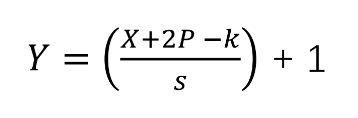

## 下面， 本文档将展示一个使用pytorch构建CNN用于MNIST手写数字识别的列子


### 在构建网络之前， 我们首先定义一下训练的超参数

In [ ]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

### 为了实验的可评估性， 我们将Pytorch的随机种子设置为1以让这次实验产生的结果一致。
### 我们使用 `TorchVision` 来调用MNIST的数据库
其中， 我们设置训练的batch_size为64， 测试集的batch_size为1000

（0.1307） 和  （0.3081） 为归一化系数。 这两个数值定义了MNIST数据集的总体平均值和标准差

In [ ]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

## 在构建完训练集之后， 我们来从训练集和测试集中分别看一下我们的数据

### 在这里， 我们随机从训练集里取出一个batch 并展示其中的一个样本

In [ ]:
import matplotlib.pyplot as plt
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)


print("The training input tensor shape is : \n", example_data.shape)
print("The training samples target is : \n", example_targets[0])

plt.imshow(example_data[0][0])
plt.show

## 构建卷积神经网络

### 我们简单构建一个由

* 2个 2-D卷积层           (convolutional layer)
* 2个全链接层              (Fully connected layer)
* 一个dropout正则化层      (dropout layer)

### 构成的卷积神经网络


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

### 简单的解释来说， 我们可以认为`torch.nn`所生成的层中包含着可以训练的网络参数
### 而`torch.nn.functional` 只是功能性操作
### `forward()` 子函数定义了网络在正向传播时会进行的网络操作
### 接下来， 我们将网络初始化同时定义训练网络的优化器

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

## 训练神经网络

###  我们首先定义几个变量来记录训练时的准确率和损失函数变化

In [ ]:
train_losses = []
train_counter = [] 
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

### 这里定义了训练过程， 优化器需要在每个sample训练之后重置梯度， 最后训练好的模型会保存为`model.pth` 和 `optimizer.pth`

In [ ]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data.to(device)
    target.to(device)
    optimizer.zero_grad()
    output = network(data)
    output.to(device)
    loss = F.nll_loss(output, target)
    loss.to(device)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), 'model.pth')
      torch.save(optimizer.state_dict(), 'optimizer.pth')

### 这里定义了测试过程， 计算训练好的CNN对于测试集的准确率

In [ ]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [ ]:
test()
for epoch in range(1, n_epochs+1):
  train(epoch)
  test()

## 评估模型的表现

### 这里我们将训练过程的损失函数和准确率可视化

In [ ]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

## 现在让我们来看一下训练好的网络和实际训练的样本是否一致

In [ ]:
with torch.no_grad():
  output = network(example_data)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
fig

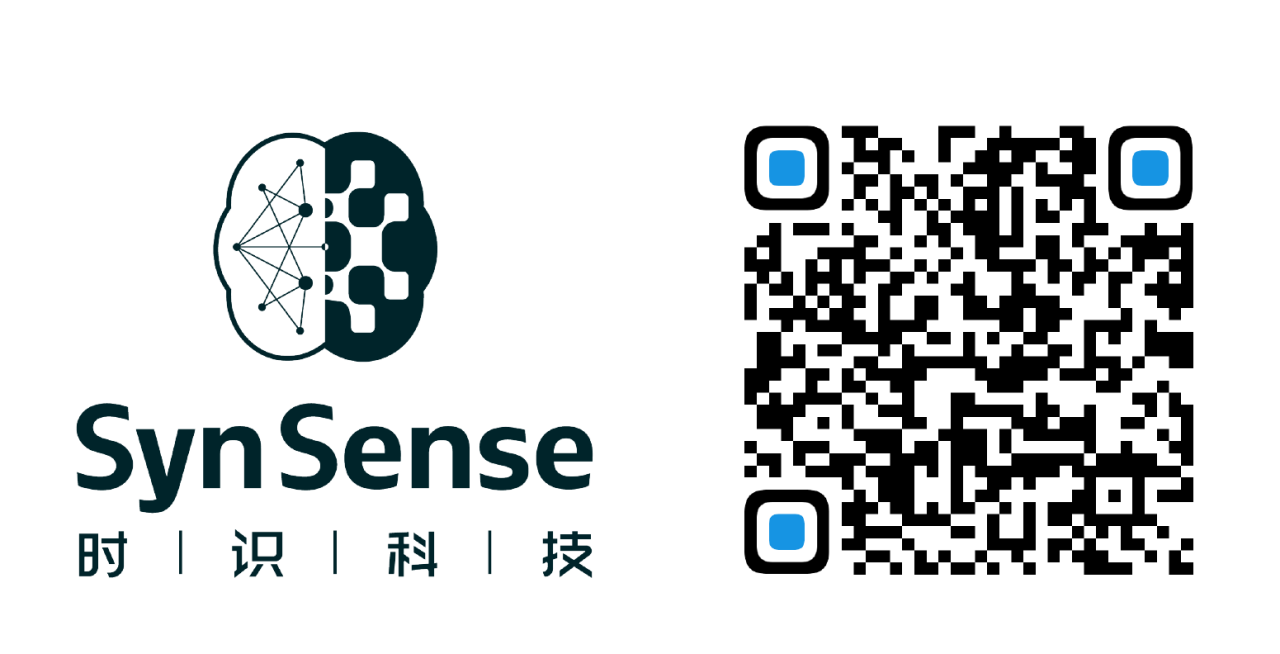
